In [1]:
cd ..

/Users/pierrerouanet/Projects/Arcadeep/tetris-over-9000


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tetris import TetrisEnv

env = TetrisEnv()

In [4]:
from tetris.bot import Bot

model = Bot(env)

In [5]:
import time

done = False
obs = env.reset()

while not done:
    action = model.predict(obs)
    obs, rew, done, info = env.step(action)
    env.render()
    time.sleep(1/20)

KeyboardInterrupt: 

In [5]:
def episod():
    done = False
    obs = env.reset()

    R = []
    while not done:
        action = model.predict(obs)
        obs, rew, done, info = env.step(action)
        R.append(rew)
    return np.array(R)

178

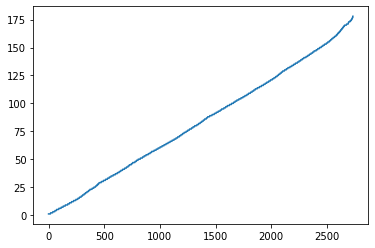

In [6]:
R = episod()

plt.plot(np.cumsum(R))
R.sum()

In [7]:
R = np.array([episod().sum() for _ in range(10)])
np.mean(R), np.std(R)

(256.3, 117.7234471122894)

In [8]:
%timeit episod()

4.68 s ± 1.75 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
from stable_baselines.gail import generate_expert_traj

In [ ]:
import time
import numpy as np

def run(n, name):
    t0 = time.time()
    trajs = generate_expert_traj(model.predict, env=env, n_episodes=n, save_path=None)
    t1 = time.time()
    print(n, 'traj done in', t1 - t0, 's')
    np.savez('{}-{}'.format(name, n), **trajs)
    return trajs

In [11]:
N = 1000
trajs = run(N)
np.savez('tetris-expert-traj-{}'.format(N), **trajs)

actions (4475306, 1)
obs (4475306, 20, 10, 1)
rewards (4475306,)
episode_returns (1000,)
episode_starts (4475306,)


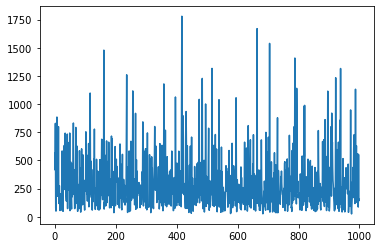

In [14]:
plt.plot(trajs['episode_returns'])

In [16]:
trajs['episode_returns'].mean()

296.493